In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap


In [5]:
df=pd.read_csv("C:\\Users\\Philipp\\OneDrive - UT Cloud\\Data_literacy_mensa\\Mensa_10-01-24\\wednesday100124_wireshark.csv")
df

,No.,Time,Source,Destination,Protocol,Length
0,1,"2024-01-10 09:01:07,758711",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298
1,2,"2024-01-10 09:01:07,784807",NaN,NaN,802.11,39
2,3,"2024-01-10 09:01:07,794917",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43
3,4,"2024-01-10 09:01:07,795010",NaN,NaN,802.11,29
4,5,"2024-01-10 09:01:07,795542",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286
...,...,...,...,...,...,...
15338369,15338370,"2024-01-10 11:59:52,317226",NaN,NaN,802.11,35
15338370,15338371,"2024-01-10 11:59:52,317274",NaN,NaN,802.11,29
15338371,15338372,"2024-01-10 11:59:52,317323",NaN,NaN,802.11,33
15338372,15338373,"2024-01-10 11:59:52,317375",NaN,NaN,802.11,47


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

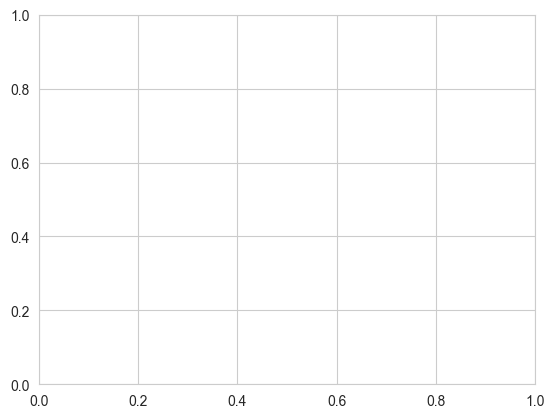

In [8]:
df["Time"] = df["Time"].str.replace(r':\d+\.\d+', '', regex=True)
df["Time"].value_counts().sort_index().plot(kind='density')


In [16]:
df['date-time'] = pd.to_datetime(df['Time'].str.replace('W. Europe Standard Time', 'CET'), format='%Y-%m-%d %H:%M:%S,%f')
df['hour:minute'] = df['date-time'].dt.strftime('%H:%M')
df

,No.,Time,Source,Destination,Protocol,Length,date-time,hour:minute
0,1,"2024-01-10 09:01:07,758711",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,2024-01-10 09:01:07.758711,09:01
1,2,"2024-01-10 09:01:07,784807",NaN,NaN,802.11,39,2024-01-10 09:01:07.784807,09:01
2,3,"2024-01-10 09:01:07,794917",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,2024-01-10 09:01:07.794917,09:01
3,4,"2024-01-10 09:01:07,795010",NaN,NaN,802.11,29,2024-01-10 09:01:07.795010,09:01
4,5,"2024-01-10 09:01:07,795542",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,2024-01-10 09:01:07.795542,09:01
...,...,...,...,...,...,...,...,...
15338369,15338370,"2024-01-10 11:59:52,317226",NaN,NaN,802.11,35,2024-01-10 11:59:52.317226,11:59
15338370,15338371,"2024-01-10 11:59:52,317274",NaN,NaN,802.11,29,2024-01-10 11:59:52.317274,11:59
15338371,15338372,"2024-01-10 11:59:52,317323",NaN,NaN,802.11,33,2024-01-10 11:59:52.317323,11:59
15338372,15338373,"2024-01-10 11:59:52,317375",NaN,NaN,802.11,47,2024-01-10 11:59:52.317375,11:59


In [17]:
(df["Source"].value_counts()).count()
#df["wlan.sa"].value_counts()

97731

In [18]:
df_first = df.drop_duplicates(subset='Source', keep='first')
df_first.tail()

,No.,Time,Source,Destination,Protocol,Length,date-time,hour:minute
15337262,15337263,"2024-01-10 11:59:51,926605",10:52:2b:3f:00:00,NaN,802.11,33,2024-01-10 11:59:51.926605,11:59
15337352,15337353,"2024-01-10 11:59:51,956867",bd:ce:b0:ad:aa:8e,b0:3c:d7:cd:0e:44,802.11,117,2024-01-10 11:59:51.956867,11:59
15337628,15337629,"2024-01-10 11:59:52,054078",4d:b5:13:b6:6f:e3,80:4e:a5:a0:5e:bc,802.11,48,2024-01-10 11:59:52.054078,11:59
15337804,15337805,"2024-01-10 11:59:52,095917",df:fc:ed:86:27:bc,NaN,802.11,48,2024-01-10 11:59:52.095917,11:59
15338017,15338018,"2024-01-10 11:59:52,173957",3b:88:ba:1a:f0:a5,d3:80:88:98:aa:2c,802.11,261,2024-01-10 11:59:52.173957,11:59


,count
hour:minute,
10:59,489
11:00,306
11:01,196
11:02,117
11:03,86
...,...
14:05,2217
14:06,3449
14:07,5745


Text(0.5, 1.0, 'first seen Count vs Time')

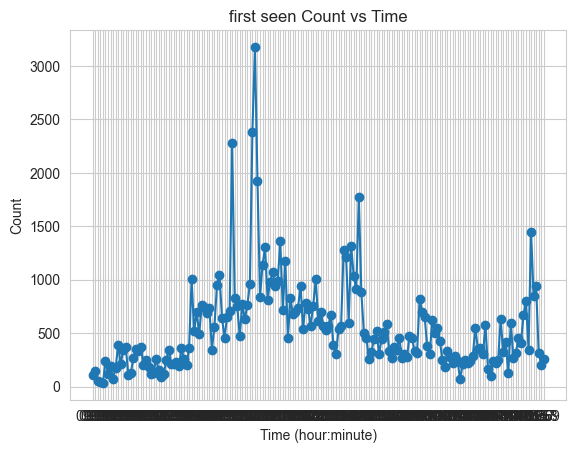

In [19]:
per_min_new=pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [22]:
df_last = df.drop_duplicates(subset='Destination', keep='last')
df_last.tail()

,No.,Time,Source,Destination,Protocol,Length,date-time,hour:minute
15338017,15338018,"2024-01-10 11:59:52,173957",3b:88:ba:1a:f0:a5,d3:80:88:98:aa:2c,802.11,261,2024-01-10 11:59:52.173957,11:59
15338320,15338321,"2024-01-10 11:59:52,303747",a2:0c:a7:fe:22:ee,00:f6:63:81:c8:6b,802.11,45,2024-01-10 11:59:52.303747,11:59
15338322,15338323,"2024-01-10 11:59:52,303951",2e:c2:34:06:37:ac,00:f6:63:81:c8:6f,802.11,43,2024-01-10 11:59:52.303951,11:59
15338365,15338366,"2024-01-10 11:59:52,315918",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,2024-01-10 11:59:52.315918,11:59
15338373,15338374,"2024-01-10 11:59:52,321428",NaN,NaN,802.11,60,2024-01-10 11:59:52.321428,11:59


Text(0.5, 1.0, 'Last seen Count vs Time')

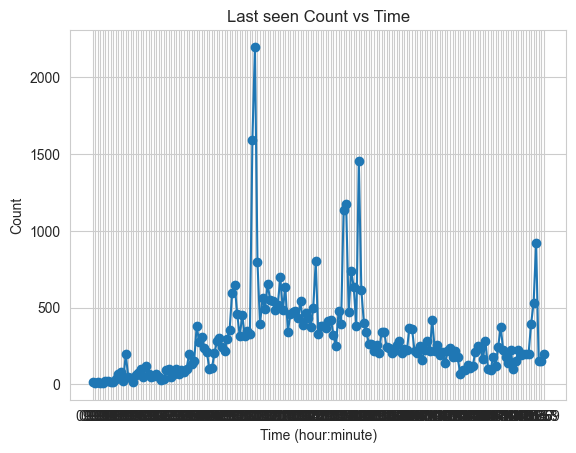

In [23]:
per_min_last=pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

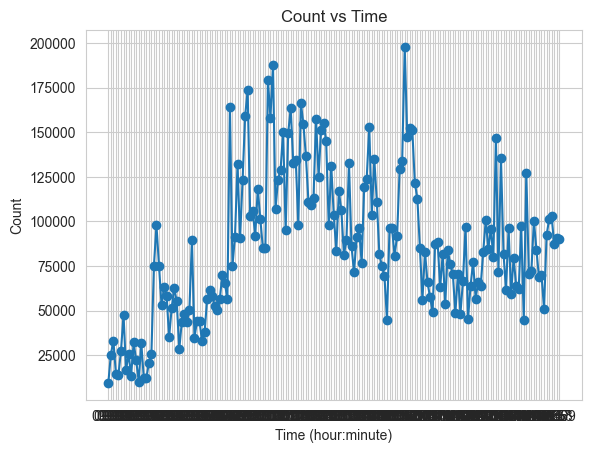

In [24]:
per_min=pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_7236\1105561439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

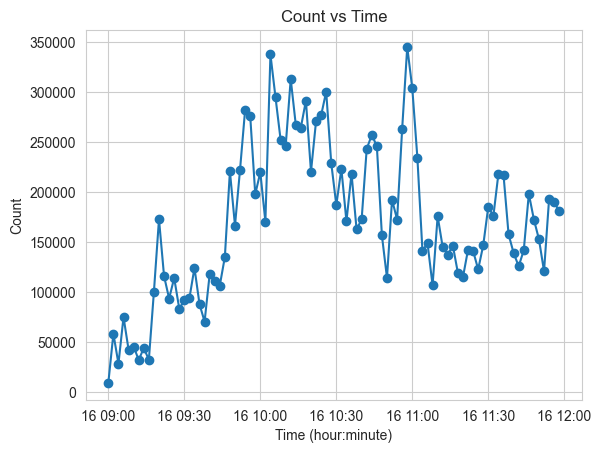

In [25]:
dtt = pd.DataFrame({'hour:minute':per_min.index.tolist(),'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

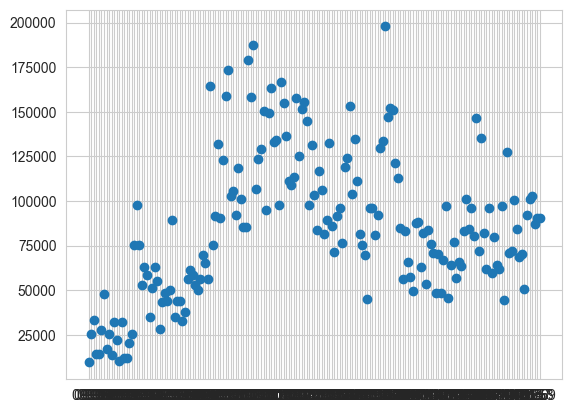

In [26]:
ax=plt.plot_date(per_min.index,per_min["count"],xdate=True)

In [24]:
from dateutil import parser
from datetime import datetime
import re